<a href="https://colab.research.google.com/github/lenovo2917/ACT.5.3Ordenamiento_A_Ju/blob/master/NETFLIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:

archivo = '/content/drive/MyDrive/datasets/NetflixOriginals.csv'

import pandas as pd

df = pd.read_csv( archivo, sep = ',' , header =0)

# Validar el contenido del archivo con respecto a datos nulos
df.isna().sum()


,0
Title,0
Genre,0
GenreLabels,0
Premiere,0
Seasons,0
SeasonsParsed,0
EpisodesParsed,0
Length,0
MinLength,0
MaxLength,0


<Axes: >

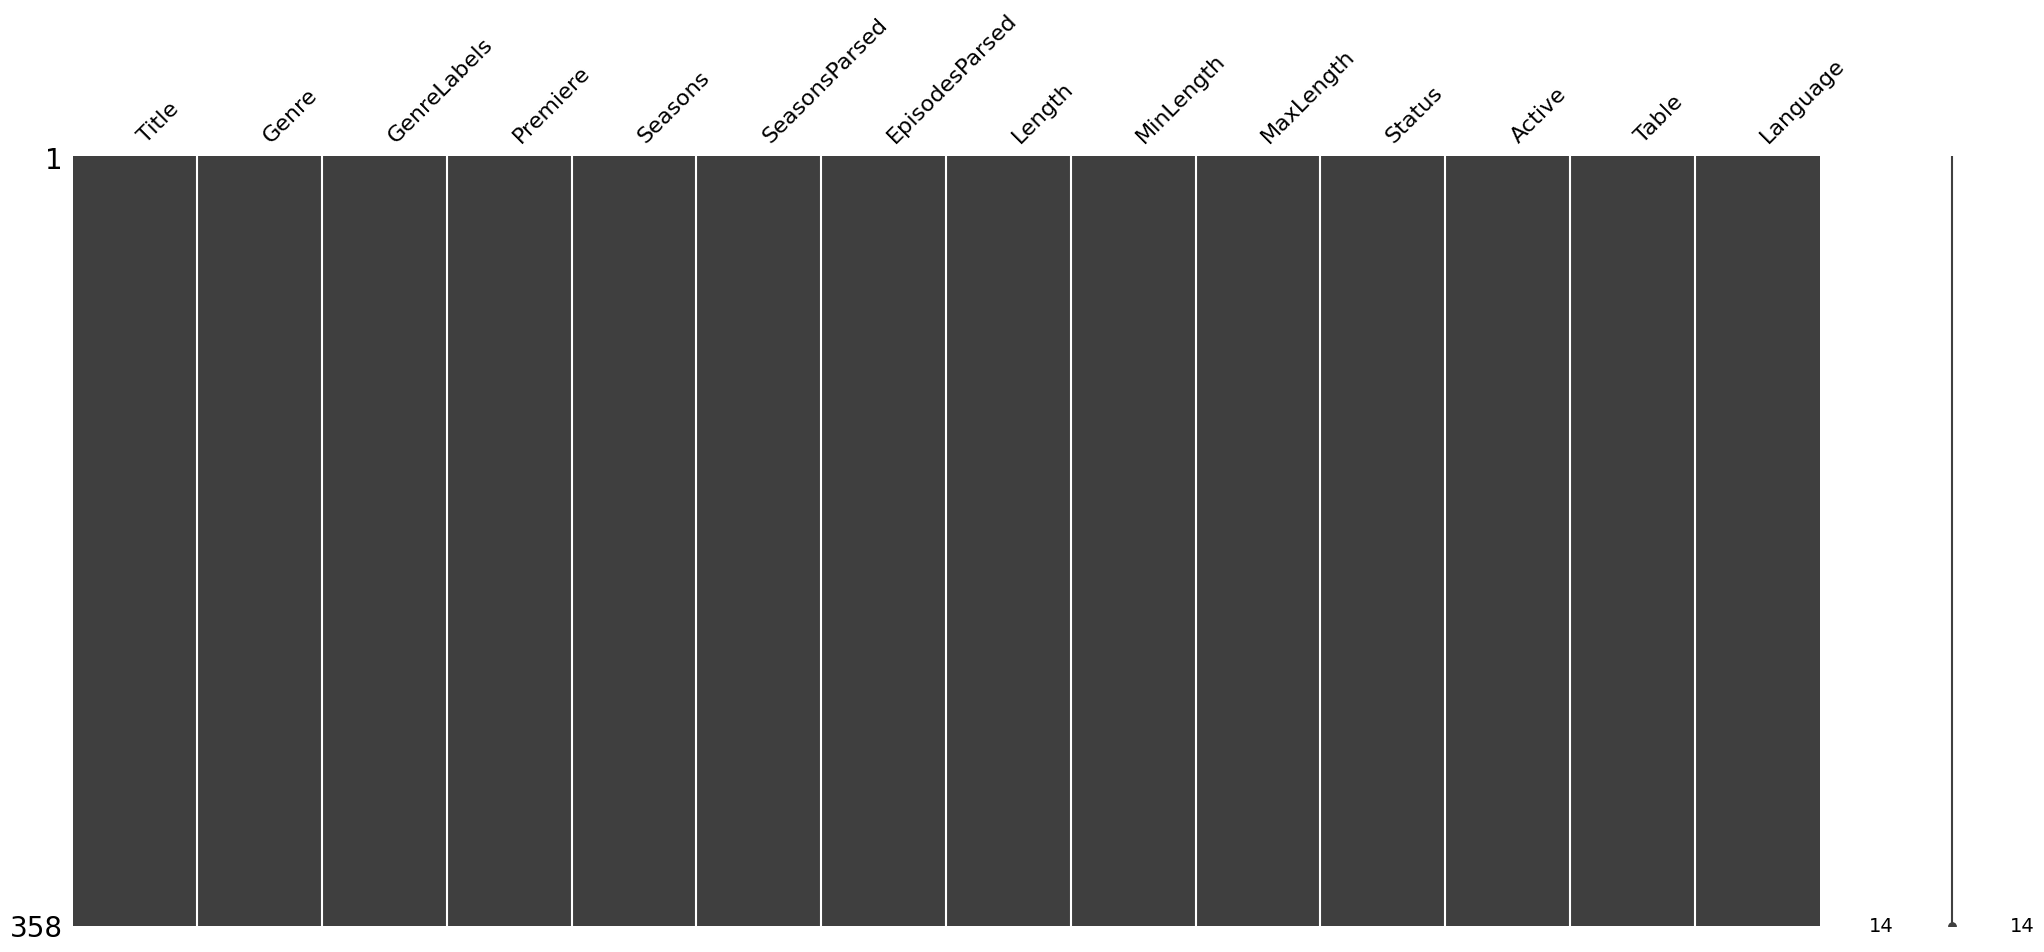

In [30]:

# Validar el contenido de datos numéricos correctos
df['SeasonsParsed'] = pd.to_numeric(df['SeasonsParsed'], errors='coerce')
df['EpisodesParsed'] = pd.to_numeric(df['EpisodesParsed'], errors='coerce')
df['MinLength'] = pd.to_numeric(df['MinLength'], errors='coerce')
df['MaxLength'] = pd.to_numeric(df['MaxLength'], errors='coerce')
df['Active'] = pd.to_numeric(df['Active'], errors='coerce')

#checar si hubo un error
print(df[['SeasonsParsed', 'EpisodesParsed', 'MinLength', 'MaxLength', 'Active']].isna().sum())


SeasonsParsed     0
EpisodesParsed    0
MinLength         0
MaxLength         0
Active            0
dtype: int64


In [ ]:
#Si tiene algun problema de lo anterior, corregirlo.
#NO HUBO PROBLEMA :)

In [2]:
%pip install missingno

In [27]:
import missingno as msno

<Axes: >

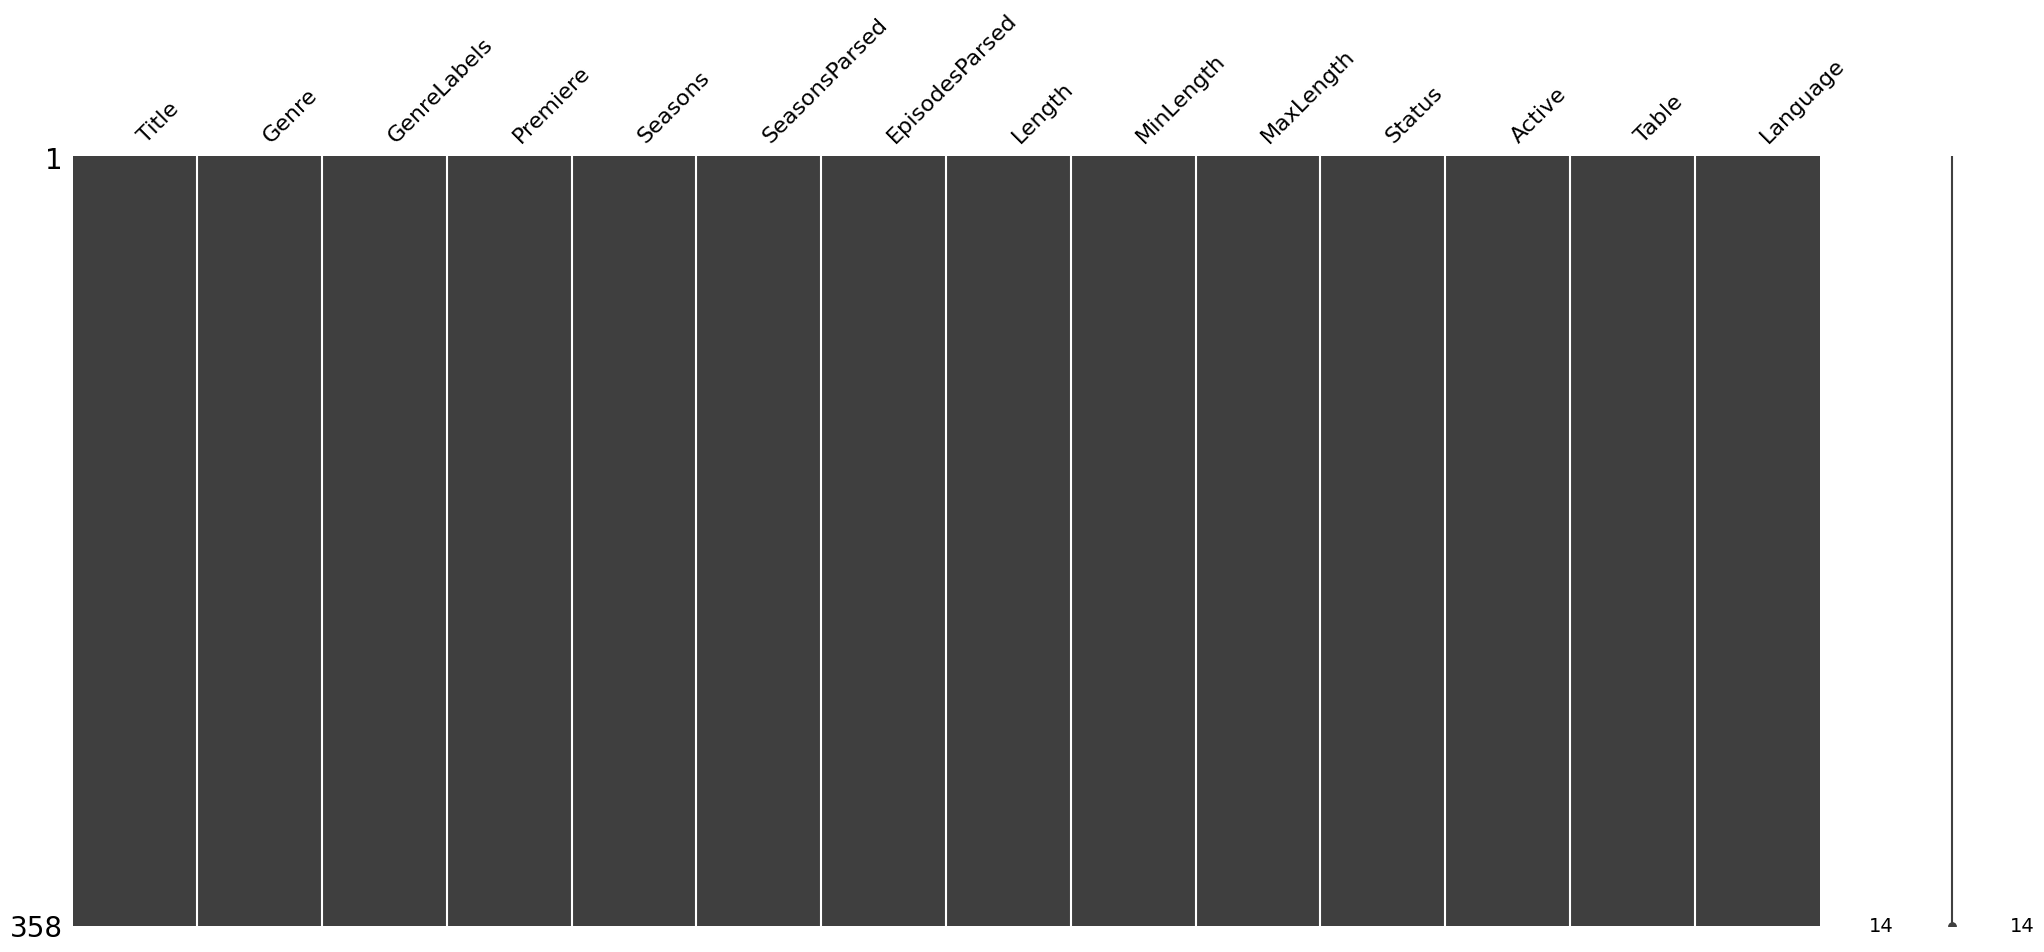

In [28]:
#   Validar el contenido del archivo con respecto a datos nulos con missingno.
msno.matrix(df)

In [11]:
#    Filtrar todas las series que sea su Lenguage: English, French y Spanish y guardar los resultados en un nuevo dataframe de nombre: df_lenguages
# se usa isin para filtrar multiples datos
df_lenguages = df.Language.isin(['English', 'French', 'Spanish'])
df_lenguages = df[df_lenguages]
df_lenguages


,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
0,House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
1,Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English
2,Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English
3,Marco Polo,Historical drama,"historical,drama",12-Dec-14,"2 seasons, 20 episodes",2,20,48–65 min.,48,65,Ended,0,Drama,English
4,Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,A Little Help with Carol Burnett,Variety show,"variety,show",4-May-18,"1 season, 12 episodes",1,12,21–29 min.,21,29,Ended,0,VarietyTalk,English
354,The Break with Michelle Wolf,Late-night,late-night,27-May-18,"1 season, 10 episodes",1,10,27 min.,27,27,Renewed,1,VarietyTalk,English
355,Norm Macdonald Has a Show,Talk show,"talk,show",14-Sep-18,"1 season, 10 episodes",1,10,26–35 min.,26,35,Pending,1,VarietyTalk,English
356,Patriot Act with Hasan Minhaj,Talk show,"talk,show",28-Oct-18,"3 volumes, 19 episodes",0,19,23–30 min.,23,30,Renewed,1,VarietyTalk,English


In [10]:
#Filtrar todas las series que  su Lenguage sea diferente a: English, French y Spanish y guardar los resultados en un nuevo dataframe de nombre: df__diferente_lenguages

df_diferente_lenguages = ~df.Language.isin(['English', 'French', 'Spanish'])
df_diferente_lenguages = df[df_diferente_lenguages]
df_diferente_lenguages

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
195,0.03,Science fiction,science-fiction,25-Nov-16,"3 seasons, 26 episodes",3,26,38–51 min.,38,51,Pending,1,ForeignLanguage,Portuguese
198,My Only Love Song,Comedy,comedy,9-Jun-17,"1 season, 20 episodes",1,20,27–30 min.,27,30,Ended,0,ForeignLanguage,Korean
199,Suburra: Blood on Rome,Crime drama,"crime,drama",6-Oct-17,"2 seasons, 18 episodes",2,18,42–62 min.,42,62,Renewed,1,ForeignLanguage,Italian
200,Blazing Transfer Students,Action comedy,"action,comedy",10-Nov-17,"1 season, 8 episodes",1,8,23–28 min.,23,28,Ended,0,ForeignLanguage,Japanese
201,Dark,Science fiction,science-fiction,1-Dec-17,"2 seasons, 18 episodes",2,18,45–61 min.,45,61,Renewed,1,ForeignLanguage,German
203,The Mechanism,Crime drama,"crime,drama",23-Mar-18,"2 seasons, 16 episodes",2,16,39–55 min.,39,55,Pending,1,ForeignLanguage,Portuguese
204,The Rain,Post-apocalyptic drama,"post-apocalyptic,drama",4-May-18,"2 seasons, 14 episodes",2,14,36–49 min.,36,49,Renewed,1,ForeignLanguage,Danish
206,Sacred Games,Drama,drama,6-Jul-18,"1 season, 8 episodes",1,8,43–55 min.,43,55,Renewed,1,ForeignLanguage,Hindi
207,Samantha!,Comedy,comedy,6-Jul-18,"2 seasons, 14 episodes",2,14,25–37 min.,25,37,Pending,1,ForeignLanguage,Portuguese
208,Jimmy: The True Story of a True Idiot,Comedy,comedy,20-Jul-18,"1 season, 9 episodes",1,9,39–64 min.,39,64,Pending,1,ForeignLanguage,Japanese


In [12]:
#Del dataframe df_lenguages que serie está Active y son activas
df_activas_lenguages = df_lenguages[df_lenguages.Status == 'Active']
df_activas_lenguages


,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language


In [15]:
#Del dataframe df_lenguages  que series su Status es: Renewed, Ended
df_RE_lenguages = df_lenguages[df_lenguages.Status.isin(['Renewed', 'Ended'])]
df_RE_lenguages

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
0,House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
1,Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English
2,Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English
3,Marco Polo,Historical drama,"historical,drama",12-Dec-14,"2 seasons, 20 episodes",2,20,48–65 min.,48,65,Ended,0,Drama,English
4,Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Bill Nye Saves the World,Science,science,21-Apr-17,"3 seasons, 25 episodes",3,25,26–41 min.,26,41,Ended,0,VarietyTalk,English
351,The Joel McHale Show with Joel McHale,Comedy,comedy,18-Feb-18,"2 parts, 19 episodes",0,19,22–28 min.,22,28,Ended,0,VarietyTalk,English
352,A Little Help with Carol Burnett,Variety show,"variety,show",4-May-18,"1 season, 12 episodes",1,12,21–29 min.,21,29,Ended,0,VarietyTalk,English
354,The Break with Michelle Wolf,Late-night,late-night,27-May-18,"1 season, 10 episodes",1,10,27 min.,27,27,Renewed,1,VarietyTalk,English


In [17]:
#    Del dataframe df_lenguages  que series su Status esdiferente a: Renewed, Ended
df_RE_lenguages_dif = df_lenguages[~df_lenguages.Status.isin(['Renewed', 'Ended'])]
df_RE_lenguages_dif

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
10,Gilmore Girls: A Year in the Life,Family drama,"family,drama",25-Nov-16,4 episodes,0,4,88–102 min.,88,102,Miniseries,0,Drama,English
11,The OA,Mystery,mystery,16-Dec-16,"2 parts, 16 episodes",0,16,31–71 min.,31,71,Pending,1,Drama,English
17,Godless,Western,western,22-Nov-17,7 episodes,0,7,41–80 min.,41,80,Miniseries,0,Drama,English
27,Tidelands,Supernatural crime drama,"supernatural,crime,drama",14-Dec-18,"1 season, 8 episodes",1,8,36–48 min.,36,48,Pending,1,Drama,English
30,Shadow,Thriller,thriller,8-Mar-19,"1 season, 8 episodes",1,8,40–49 min.,40,49,Pending,1,Drama,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Awake: The Million Dollar Game,Reality television,"reality,television",14-Jun-19,"1 season, 8 episodes",1,8,35–41 min.,35,41,Pending,1,Reality,English
349,Beyond Stranger Things,Aftershow,aftershow,27-Oct-17,"1 season, 7 episodes",1,7,15–25 min.,15,25,Pending,1,VarietyTalk,English
350,My Next Guest Needs No Introduction with David...,Interview,interview,12-Jan-18,"2 seasons, 12 episodes",2,12,41–58 min.,41,58,Pending,1,VarietyTalk,English
355,Norm Macdonald Has a Show,Talk show,"talk,show",14-Sep-18,"1 season, 10 episodes",1,10,26–35 min.,26,35,Pending,1,VarietyTalk,English


In [18]:
#Filtrar todas las series que sean Genre: Mystery, Thriller y  guardarlos resultados en un nuevo dataframe de nombre: df_mys_thriller
df_mys_thriller = df[df.Genre.isin(['Mystery', 'Thriller'])]
df_mys_thriller


,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
4,Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English
11,The OA,Mystery,mystery,16-Dec-16,"2 parts, 16 episodes",0,16,31–71 min.,31,71,Pending,1,Drama,English
30,Shadow,Thriller,thriller,8-Mar-19,"1 season, 8 episodes",1,8,40–49 min.,40,49,Pending,1,Drama,English


In [ ]:
# Filtrar las series que su Genre es Biography
df_biography = df[df.Genre == 'Biography']
df_biography

In [ ]:
# De dataframe df_lenguages, mostrar aquellas series que su Genre es Comedy y guardar en df_comedies
df_comedies = df_lenguages[df_lenguages.Genre == 'Comedy']
df_comedies

In [19]:
# De todas las series que están disponibles, guardar en un dataframe df_mas_de_5 aquellas que tengan 5 o más temporadas en SeasonsParsed
df_mas_de_5 = df.SeasonsParsed >= 5
df_mas_de_5 = df[df_mas_de_5]
df_mas_de_5

In [ ]:
# De todas las series que están disponibles, guardar en un dataframe df_menos_de_4 aquellas que tengan menos de 4 temporadas en SeasonsParsed
df_menos_de_4 = df.SeasonsParsed < 4
df_menos_de_4 = df[df_menos_de_4]
df_menos_de_4


In [ ]:
# De todas las series que están disponibles, guardar en un dataframe df_60_80 aquellas series que tengan de duración MaxLength entre 60 a 80 minutos
df_60_80 = df[(df.MaxLength >= 60) & (df.MaxLength <= 80)]
df_60_80

ALONDRA MYRIEL GUTIERREZ VILLEGAS 20091100